In [48]:
# Tensorflow 2.1

import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Raw Data Loading
df = pd.read_csv('./data/Fashion_MNIST/train.csv')

# 결측치나 이상치는 없음
# Feature Engineering 할 필요가 없음

# Data Split
x_data_train, x_data_test, t_data_train, t_data_test = \
train_test_split(df.drop(['index','label'], axis=1, inplace=False), df['label'], test_size=0.2, random_state=0)

# Min-Max Normalization
# scaler = MinMaxScaler()
# scaler.fit(x_data_train)
# x_data_train_norm = scaler.transform(x_data_train)
# x_data_test_norm = scaler.transform(x_data_test)

x_data_train_norm = x_data_train.values/255
x_data_test_norm = x_data_test.values/255

# TF 2.1 구현
model = Sequential()
model.add(Dense(1000, activation='relu', kernel_initializer='he_uniform',
                input_shape=(x_data_train_norm.shape[1],)))  # input_shape로 input layer의 역할까지도 처리
model.add(Dropout(0.3))

model.add(Dense(500, activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(0.3))

model.add(Dense(250, activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(0.3))

model.add(Dense(10, activation='softmax', kernel_initializer='he_uniform'))

model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='sparse_categorical_crossentropy',   # sparse를 붙여주면 one-hot encoing 작업을 생'략 가능
              metrics=['sparse_categorical_accuracy'])

history = model.fit(x_data_train_norm,
                    t_data_train,
                    epochs=100,
                    batch_size=100,
                    verbose=1,
                    validation_split=0.3)

Train on 33600 samples, validate on 14400 samples
Epoch 1/100
33600/33600 [==============================] - 11s 323us/sample - loss: 0.9527 - sparse_categorical_accuracy: 0.6669 - val_loss: 0.5386 - val_sparse_categorical_accuracy: 0.8097
Epoch 2/100
33600/33600 [==============================] - 8s 247us/sample - loss: 0.5802 - sparse_categorical_accuracy: 0.7943 - val_loss: 0.4501 - val_sparse_categorical_accuracy: 0.8439
Epoch 3/100
33600/33600 [==============================] - 8s 244us/sample - loss: 0.5032 - sparse_categorical_accuracy: 0.8235 - val_loss: 0.4091 - val_sparse_categorical_accuracy: 0.8550
Epoch 4/100
33600/33600 [==============================] - 8s 242us/sample - loss: 0.4548 - sparse_categorical_accuracy: 0.8397 - val_loss: 0.3903 - val_sparse_categorical_accuracy: 0.8623
Epoch 5/100
33600/33600 [==============================] - 8s 248us/sample - loss: 0.4246 - sparse_categorical_accuracy: 0.8487 - val_loss: 0.3708 - val_sparse_categorical_accuracy: 0.8681
Epoc

Epoch 44/100
33600/33600 [==============================] - 8s 239us/sample - loss: 0.1338 - sparse_categorical_accuracy: 0.9517 - val_loss: 0.3495 - val_sparse_categorical_accuracy: 0.8956
Epoch 45/100
33600/33600 [==============================] - 8s 238us/sample - loss: 0.1306 - sparse_categorical_accuracy: 0.9516 - val_loss: 0.3381 - val_sparse_categorical_accuracy: 0.8980
Epoch 46/100
33600/33600 [==============================] - 8s 238us/sample - loss: 0.1274 - sparse_categorical_accuracy: 0.9522 - val_loss: 0.3420 - val_sparse_categorical_accuracy: 0.89552s - loss: 0.1281 - s
Epoch 47/100
33600/33600 [==============================] - 8s 238us/sample - loss: 0.1239 - sparse_categorical_accuracy: 0.9542 - val_loss: 0.3529 - val_sparse_categorical_accuracy: 0.8950
Epoch 48/100
33600/33600 [==============================] - 8s 238us/sample - loss: 0.1182 - sparse_categorical_accuracy: 0.9559 - val_loss: 0.3525 - val_sparse_categorical_accuracy: 0.8961
Epoch 49/100
33600/33600 [===

33600/33600 [==============================] - 8s 243us/sample - loss: 0.0630 - sparse_categorical_accuracy: 0.9768 - val_loss: 0.4654 - val_sparse_categorical_accuracy: 0.8987
Epoch 88/100
33600/33600 [==============================] - 8s 231us/sample - loss: 0.0589 - sparse_categorical_accuracy: 0.9787 - val_loss: 0.4420 - val_sparse_categorical_accuracy: 0.8958
Epoch 89/100
33600/33600 [==============================] - 8s 232us/sample - loss: 0.0557 - sparse_categorical_accuracy: 0.9798 - val_loss: 0.4820 - val_sparse_categorical_accuracy: 0.8963
Epoch 90/100
33600/33600 [==============================] - 8s 228us/sample - loss: 0.0615 - sparse_categorical_accuracy: 0.9771 - val_loss: 0.4579 - val_sparse_categorical_accuracy: 0.8986
Epoch 91/100
33600/33600 [==============================] - 8s 234us/sample - loss: 0.0577 - sparse_categorical_accuracy: 0.9789 - val_loss: 0.4634 - val_sparse_categorical_accuracy: 0.8960
Epoch 92/100
33600/33600 [==============================] - 8s 

              precision    recall  f1-score   support

           0       0.84      0.84      0.84      1189
           1       0.98      0.98      0.98      1189
           2       0.79      0.88      0.83      1204
           3       0.91      0.92      0.92      1260
           4       0.86      0.80      0.83      1208
           5       0.97      0.98      0.97      1188
           6       0.76      0.73      0.74      1195
           7       0.95      0.95      0.95      1160
           8       0.98      0.98      0.98      1210
           9       0.97      0.96      0.96      1197

    accuracy                           0.90     12000
   macro avg       0.90      0.90      0.90     12000
weighted avg       0.90      0.90      0.90     12000

dict_keys(['loss', 'sparse_categorical_accuracy', 'val_loss', 'val_sparse_categorical_accuracy'])


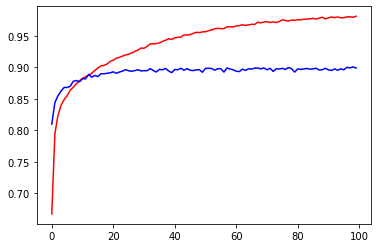

In [50]:
result = np.argmax(model.predict(x_data_test_norm), axis=1)
print(classification_report(t_data_test, result))

import matplotlib.pyplot as plt

print(history.history.keys())
plt.plot(history.history['sparse_categorical_accuracy'], color='r')
plt.plot(history.history['val_sparse_categorical_accuracy'], color='b')
plt.show()

In [53]:
test = pd.read_csv('./data/Fashion_MNIST/test.csv')
test = test.drop('index', axis=1, inplace=False)
test_data = test/255
# scaler = MinMaxScaler()
# scaler.fit(test)
# test_data = scaler.transform(test)
result = np.argmax(model.predict(test_data), axis=1)
print(result)

submission = pd.DataFrame()
submission['index'] = np.arange(0,len(result))
submission['label'] = result
display(submission)
submission.to_csv('./data/Fashion_MNIST/submission.csv', index=False)

[0 1 2 ... 8 8 1]


In [86]:
# Tensorflow 2.1

import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout,Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam

# Raw Data Loading
df = pd.read_csv('./data/Fashion_MNIST/train.csv')

# 결측치나 이상치는 없음
# Feature Engineering 할 필요가 없음

# Data Split
x_data_train, x_data_test, t_data_train, t_data_test = \
train_test_split(df.drop(['index','label'], axis=1, inplace=False), df['label'], test_size=0.3, random_state=0)

# Normalization
x_data_train = x_data_train/255
x_data_test = x_data_test/255

# Reshape
x_data_train = x_data_train.values.reshape(-1,28,28,1)
x_data_test = x_data_test.values.reshape(-1,28,28,1)

# TF 2.1
model = Sequential()
# Conv layer 1
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# Conv layer 2
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

# FC layer
model.add(Flatten())    # 1차원으로 변환
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

In [91]:
model.compile(optimizer=Adam(learning_rate=1e-3),
              loss='sparse_categorical_crossentropy',   # sparse를 붙여주면 one-hot encoing 작업을 생'략 가능
              metrics=['sparse_categorical_accuracy'])

history = model.fit(x_data_train,
                    t_data_train,
                    epochs=5,
                    batch_size=100,
                    verbose=1,
                    validation_split=0.3)

Train on 29399 samples, validate on 12601 samples
Epoch 1/5
29399/29399 [==============================] - 172s 6ms/sample - loss: 0.1049 - sparse_categorical_accuracy: 0.9601 - val_loss: 0.2626 - val_sparse_categorical_accuracy: 0.9263
Epoch 2/5
29399/29399 [==============================] - 154s 5ms/sample - loss: 0.0970 - sparse_categorical_accuracy: 0.9630 - val_loss: 0.2912 - val_sparse_categorical_accuracy: 0.9230
Epoch 3/5
29399/29399 [==============================] - 158s 5ms/sample - loss: 0.0974 - sparse_categorical_accuracy: 0.9637 - val_loss: 0.2543 - val_sparse_categorical_accuracy: 0.9229
Epoch 4/5
29399/29399 [==============================] - 153s 5ms/sample - loss: 0.0943 - sparse_categorical_accuracy: 0.9635 - val_loss: 0.2653 - val_sparse_categorical_accuracy: 0.9225
Epoch 5/5
29399/29399 [==============================] - 157s 5ms/sample - loss: 0.0922 - sparse_categorical_accuracy: 0.9654 - val_loss: 0.2684 - val_sparse_categorical_accuracy: 0.9226


In [93]:
pred = model.predict(x_data_test)
print(pred)

[[1.5242510e-11 1.0000000e+00 2.8148374e-15 ... 2.2242723e-17
  7.6095302e-12 2.4510611e-18]
 [1.3837391e-10 7.6347669e-19 1.3675934e-08 ... 3.8736604e-19
  3.3780694e-14 1.7526071e-13]
 [1.0076769e-13 1.4077192e-18 1.2067755e-19 ... 2.5034440e-15
  1.0000000e+00 3.5514126e-15]
 ...
 [1.0000000e+00 4.0085098e-16 1.7582891e-10 ... 9.7447071e-18
  4.2061901e-16 9.8212602e-23]
 [8.9733052e-01 2.1531540e-12 1.6650012e-03 ... 4.6246600e-12
  4.5525059e-10 1.3953050e-12]
 [5.0185855e-07 7.8666263e-16 9.9998105e-01 ... 1.3208331e-16
  1.5008167e-12 2.4536456e-16]]


              precision    recall  f1-score   support

           0       0.89      0.84      0.86      1799
           1       1.00      0.99      0.99      1843
           2       0.87      0.91      0.89      1808
           3       0.93      0.94      0.93      1849
           4       0.91      0.84      0.87      1765
           5       0.99      0.97      0.98      1786
           6       0.76      0.82      0.79      1787
           7       0.96      0.96      0.96      1789
           8       0.99      0.98      0.99      1795
           9       0.96      0.98      0.97      1779

    accuracy                           0.92     18000
   macro avg       0.93      0.92      0.92     18000
weighted avg       0.93      0.92      0.92     18000

dict_keys(['loss', 'sparse_categorical_accuracy', 'val_loss', 'val_sparse_categorical_accuracy'])


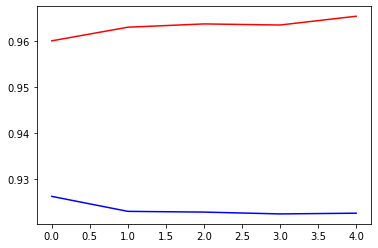

In [98]:
result = np.argmax(pred, axis=1)
print(classification_report(t_data_test, result))
import matplotlib.pyplot as plt

print(history.history.keys())
plt.plot(history.history['sparse_categorical_accuracy'], color='r')
plt.plot(history.history['val_sparse_categorical_accuracy'], color='b')
plt.show()

In [100]:
test = pd.read_csv('./data/Fashion_MNIST/test.csv')
test = test.drop('index', axis=1, inplace=False)
test_data = test/255
test_data = test_data.values.reshape(-1,28,28,1)
# scaler = MinMaxScaler()
# scaler.fit(test)
# test_data = scaler.transform(test)
result = np.argmax(model.predict(test_data), axis=1)
print(result)

submission = pd.DataFrame()
submission['index'] = np.arange(0,len(result))
submission['label'] = result
display(submission)
submission.to_csv('./data/Fashion_MNIST/submission.csv', index=False)

[0 1 2 ... 8 8 1]


,index,label
0,0,0
1,1,1
2,2,2
3,3,2
4,4,3
...,...,...
9995,9995,0
9996,9996,6
9997,9997,8
9998,9998,8
